<a href="https://colab.research.google.com/github/mfathul21/marketing-campaign-analytics/blob/main/Marketing_Campaign_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank's Marketing Campaign Analytics**

## **Introduction**

In today's competitive financial landscape, effective marketing strategies are crucial for banks aiming to attract and retain customers for term deposits. This project analyzes a dataset from a time deposit campaign to derive actionable insights and recommendations for optimizing campaign effectiveness.

Through detailed analysis, this project aims to identify patterns and correlations that influence term deposit subscriptions. By leveraging these insights, banks can refine their marketing strategies to better target and engage potential customers. This approach not only enhances subscription rates but also improves resource allocation and customer retention efforts.

The recommendations derived from this analysis are tailored to enhance campaign efficiency, prioritize effective communication strategies, and maximize engagement with target demographics. Ultimately, this project aims to equip financial institutions with actionable insights to achieve better campaign outcomes and strengthen customer relationships in the competitive banking industry.

### **Dataset Information**

The "bank target marketing" dataset is a collection of data focused on a bank's marketing campaign to acquire deposits from customers. This dataset contains various attributes related to customer demographics, their previous interactions with the bank, and the outcomes of the marketing campaign conducted.

This dataset is valuable for analyzing the factors influencing customers' decisions to subscribe to term deposits, as well as for predicting customer behavior in future similar marketing campaigns. By understanding this dataset, banks or marketing analysts can optimize their marketing strategies to enhance the success of deposit campaigns in the future.

### **Attribute Information**

- **age**: The age of the customer. (Numerical)
- **job**: The occupation/employment status of the customer. (Categorical)
- **marital**: The marital status of the customer. (Categorical)
- **education**: The education level attained by the customer. (Categorical)
- **default**: Whether the customer has credit in default or not. (Categorical)
- **housing**: Whether the customer has a housing loan or not. (Categorical)
- **loan**: Has personal loan? (Categorical)
- **contact**: Type of communication used to contact customers (phone, cellular, etc.). (Categorical)
- **month**: Last contact month of year. (Categorical)
- **day_of_week**: Last contact day of the week. (Categorical)
- **duration**: Last contact duration in seconds. (Numerical)
- **campaign**: Number of contacts performed during this campaign for the customer. (Numerical)
- **pdays**: The number of days passed by after contact from the previous campaign. (Numerical)
- **previous**: Number of contacts performed before this campaign for the customer. (Numerical)
- **poutcome**: Outcome from the previous marketing campaign. (Categorical)
- **y**: Has the client subscribed a term deposit? (Categorical)

## Data Preprocessing

The Primary step in any modeling/analysis is the data preprocessing. To do the analysis, we need the data. I will download the data from Google Drive directly and this data is sourced from Kaggle. Here is the link for to download the dataset [click here](https://drive.google.com/uc?export=download&id=1Em0JDdRqMzskQ_sEv1G2iwhmNg2mJ_HZ)

First import all the necessary libraries and load the data.

### **Import Library and Load Data**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [3]:
link_to_data = 'https://drive.google.com/uc?export=download&id=1Em0JDdRqMzskQ_sEv1G2iwhmNg2mJ_HZ'
df = pd.read_csv(link_to_data)

In [4]:
bank = df.copy()

### **Checking the Data Types**

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


We have 32950 rows of data with 16 features (including independent and dependent variables) consisting of 5 numerical features and 11 categorical features.

In [6]:
num_col = bank.select_dtypes(include=np.number).columns.tolist()
cat_col = bank.select_dtypes(include='object').columns.tolist()

In [7]:
print(bank[num_col].head())

   age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0


In [8]:
print(bank[cat_col].head())

            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


See that we have the correct data types for all the features.

### **Checking for Inconsistent or Invalid Values**

**Categorical Features**

In [9]:
print(bank[cat_col].describe())

           job  marital          education default housing   loan   contact  \
count    32950    32950              32950   32950   32950  32950     32950   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq      8314    19953               9736   26007   17254  27131     20908   

        month day_of_week     poutcome      y  
count   32950       32950        32950  32950  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    11011        6857        28416  29238  


In [10]:
for col in cat_col:
    print(f'{col} :\n{bank[col].unique()}\n')

job :
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']

marital :
['married' 'divorced' 'single' 'unknown']

education :
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']

default :
['unknown' 'no' 'yes']

housing :
['no' 'yes' 'unknown']

loan :
['no' 'yes' 'unknown']

contact :
['cellular' 'telephone']

month :
['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']

day_of_week :
['wed' 'mon' 'tue' 'fri' 'thu']

poutcome :
['nonexistent' 'failure' 'success']

y :
['no' 'yes']



Take a look for some categorical feature such as job, marital, education, and default have strange 'unknown' values which indicate that the data is missing or undefined. Therefore, these values will be handled in the next step to handle missing values to be removed or imputed. In addition, in the job feature there is an inconsistent or mistyped value of 'admin.', so it needs to be changed to 'admin' only.

In [11]:
bank['job'].replace('admin.', 'admin', inplace=True)
bank['job'].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

**Numerical Features**

In [12]:
print(bank[num_col].describe())

                age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000


Look, at the pdays feature which has a majority value of 999 and at first glance it looks like an invalid value. However, if you pay attention to the information attribute regarding pdays, it is the number of days since the customer was last contacted from the previous campaign. Therefore, we can indicate the value 999 as indicating that this is the first time the customer has participated in or joined a bank campaign, so it can be concluded that the value 999 is not an invalid value.

So for numerical features we also don't have invalid values.

### **Checking for missing values and clean**

In [13]:
bank.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Using the .isna() method we can see that we have no missing values, but if you remember in the previous step we found an 'unknown' value that indicated a missing value. so, we'll handle it for that value.

In [14]:
df_missing = pd.DataFrame()
df_missing['feature'] = bank.columns.values
df_missing['sum_of_unknown'] = bank.isin(['unknown']).sum().values
df_missing['rate_of_unknown'] = df_missing['sum_of_unknown'] / df.shape[0]
df_missing = df_missing.sort_values(by='rate_of_unknown', ascending=False).reset_index(drop=True)
print(df_missing[df_missing['rate_of_unknown'] > 0])

     feature  sum_of_unknown  rate_of_unknown
0    default            6940         0.210622
1  education            1397         0.042398
2    housing             796         0.024158
3       loan             796         0.024158
4        job             265         0.008042
5    marital              65         0.001973


For missing (unknown) values ​​on marital and job features we can reduce them because the level of ignorance is very small, namely less than 1%. Meanwhile, for features whose loss value is less than 10%, we can calculate the value using feature mode without known value. Additionally, if the missing values ​​are more than 10% like the default feature, we can remove the feature to avoid bias in model development.

In [15]:
# drop rows (unknown value less than 1%)
bank = bank[~(bank['marital'] == 'unknown')]
bank = bank[~(bank['job'] == 'unknown')]

# imputation data with mode (unknown value less than 10%)
unknown_loan = bank[bank['loan']!='unknown']['loan']
unknown_housing = bank[bank['housing']!='unknown']['housing']
unknown_education = bank[bank['education']!='unknown']['education']
bank['loan'] = bank['loan'].apply(lambda x: x if x != 'unknown' else unknown_loan.mode()[0])
bank['housing'] = bank['housing'].apply(lambda x: x if x != 'unknown' else unknown_housing.mode()[0])
bank['education'] = bank['education'].apply(lambda x: x if x != 'unknown' else unknown_education.mode()[0])

# drop columns (unknown value over than 10%)
bank.drop(['default'], axis=1, inplace=True)

# check unknown values
bank.isin(['unknown']).sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Now we have data that is clean of missing values.

### **Checking and handling for data duplicated**

In [16]:
bank.duplicated().sum()

9

In [17]:
bank.drop_duplicates(inplace=True)
bank.duplicated().sum()

0

We have duplicate data, so we can deduplicate this data.

## **Exploratory Data Analysis**

Before jumping into the Modeling, it is always important and necessary to explore the data. This helps us to understand the data and the business better.

Exploratory data analysis helps us to answer questions such as:
- What are the characteristics of customers who are participants in the term deposit campaign?
- How does the customer's age preference affect his or her opportunity to subscribe to a term deposit?
- Generally, customers who decide to subscribe to term deposits from this campaign do what they do?
- Are customers with married marital status more likely to subscribe to term deposits?
- Are there differences in education levels in customers' decisions to subscribe to term deposits?
- Are customers who have a housing loan (KPR) or have a personal loan more likely to subscribe to a term deposit? how does it affect?
- How does the timing of the campaign, such as the day of the week, affect customers' decisions to subscribe or not? does it have any influence? then what about the moon?
- How does the last duration and number of times carried out during this contact campaign influence the customer's decision to subscribe to a term deposit?
- How do the results of previous campaigns influence the success of the current campaign, namely term deposits?

### **Univariate Analysis**

**What are the characteristics of customers who are participants in the term deposit campaign?**

In [18]:
print(f'List of numerical features: \n{num_col}')

List of numerical features: 
['age', 'duration', 'campaign', 'pdays', 'previous']


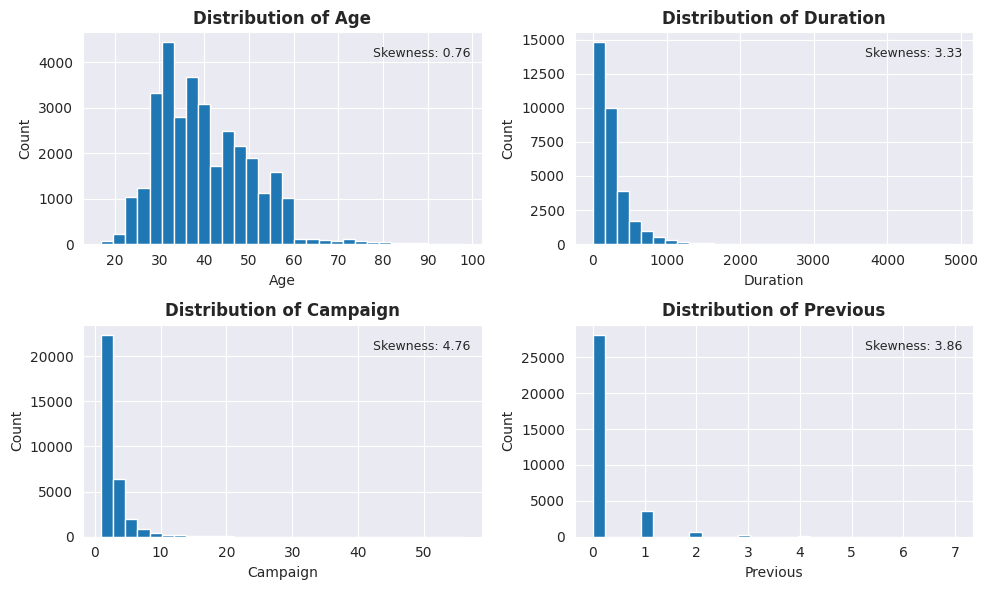

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.hist(bank['age'], bins=30)
ax1.set_title('Distribution of Age', fontdict={'weight':'bold'})
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.hist(bank['duration'], bins=30)
ax2.set_title('Distribution of Duration', fontdict={'weight':'bold'})
ax2.set_xlabel('Duration')
ax2.set_ylabel('Count')

ax3.hist(bank['campaign'], bins=30)
ax3.set_title('Distribution of Campaign', fontdict={'weight':'bold'})
ax3.set_xlabel('Campaign')
ax3.set_ylabel('Count')

ax4.hist(bank['previous'], bins=30)
ax4.set_title('Distribution of Previous', fontdict={'weight':'bold'})
ax4.set_xlabel('Previous')
ax4.set_ylabel('Count')

age_skew, duration_skew, campaign_skew, previous_skew = bank[['age','duration','campaign', 'previous']].skew().values
ax1.text(0.85, 0.90, f'Skewness: {age_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax1.transAxes)
ax2.text(0.85, 0.90, f'Skewness: {duration_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax2.transAxes)
ax3.text(0.85, 0.90, f'Skewness: {campaign_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax3.transAxes)
ax4.text(0.85, 0.90, f'Skewness: {previous_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax4.transAxes)

plt.tight_layout()
plt.show()

- Participants in the time deposit campaign were predominantly customers aged 30-40 years.
- The duration of contact made was mostly less than 10 minutes, but there were a small number of customers with contact duration of more than 30 minutes and even 1 hour.
- The number of contacts made to each customer during the campaign was positively skewed indicating that the majority of contacts made were small.
- The number of contacts made before the campaign also shows a positive skew with the majority of customers having never been contacted before (value 0).

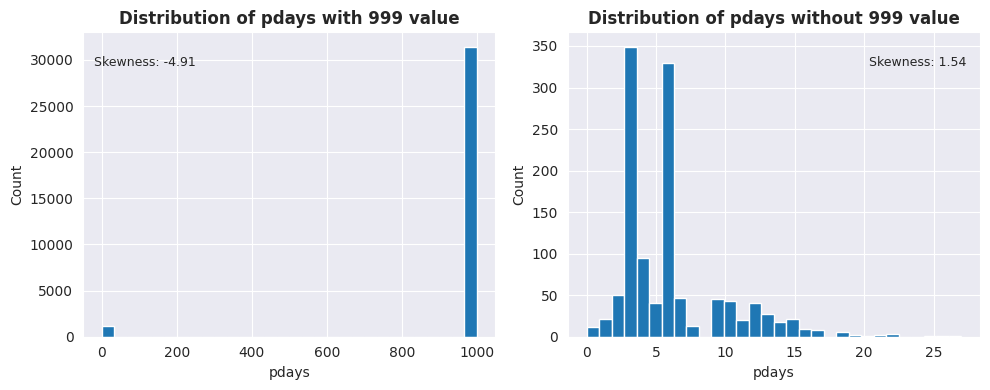

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1, ax2 = ax.flatten()

ax1.hist(bank['pdays'], bins=30)
ax1.set_xlabel('pdays')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of pdays with 999 value', fontdict={'weight':'bold'})

ax2.hist(bank[bank['pdays']!=999]['pdays'], bins=30)
ax2.set_xlabel('pdays')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of pdays without 999 value', fontdict={'weight':'bold'})

pdays_skew = bank['pdays'].skew()
pdays_999_skew = bank[bank['pdays']!=999]['pdays'].skew()
ax1.text(0.15, 0.90, f'Skewness: {pdays_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax1.transAxes)
ax2.text(0.85, 0.90, f'Skewness: {pdays_999_skew:.2f}', horizontalalignment='center', verticalalignment='center', fontdict={'fontsize':9}, transform=ax2.transAxes)


plt.tight_layout()
plt.show()

In [21]:
bank[bank['pdays']==999]['poutcome'].value_counts()

poutcome
nonexistent    28132
failure         3282
Name: count, dtype: int64

In [22]:
bank[bank['pdays']==999]['previous'].value_counts()

previous
0    28132
1     2954
2      275
3       41
4       10
5        1
6        1
Name: count, dtype: int64

In [23]:
bank[bank['poutcome']=='nonexistent']['previous'].value_counts()

previous
0    28132
Name: count, dtype: int64

In [24]:
bank[bank['poutcome']=='nonexistent']['pdays'].value_counts()

pdays
999    28132
Name: count, dtype: int64

Note that for the number of days after contact from the previous campaign, the majority of them have a value of 999, which indicates that the time is very long or that no contact or campaign has been made to customers with a value of 999 before. In addition, **ignoring the 999 value**, it was found that most customers were contacted one week after the previous campaign.

In [25]:
cat_col.remove('default')
print(f'List of categorical features: \n{cat_col}')

List of categorical features: 
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


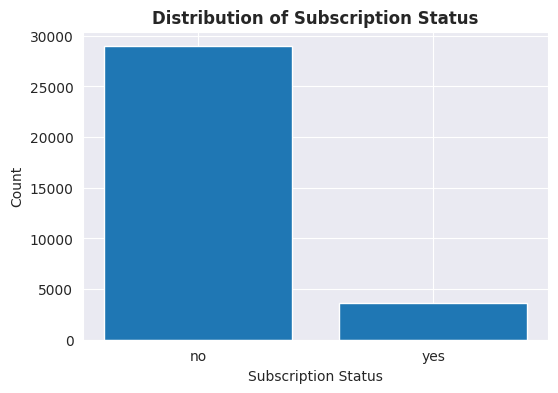

In [26]:
plt.figure(figsize=(6, 4))
plt.bar(bank['y'].value_counts().index, bank['y'].value_counts().values)
plt.title('Distribution of Subscription Status', fontdict={'weight':'bold'})
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

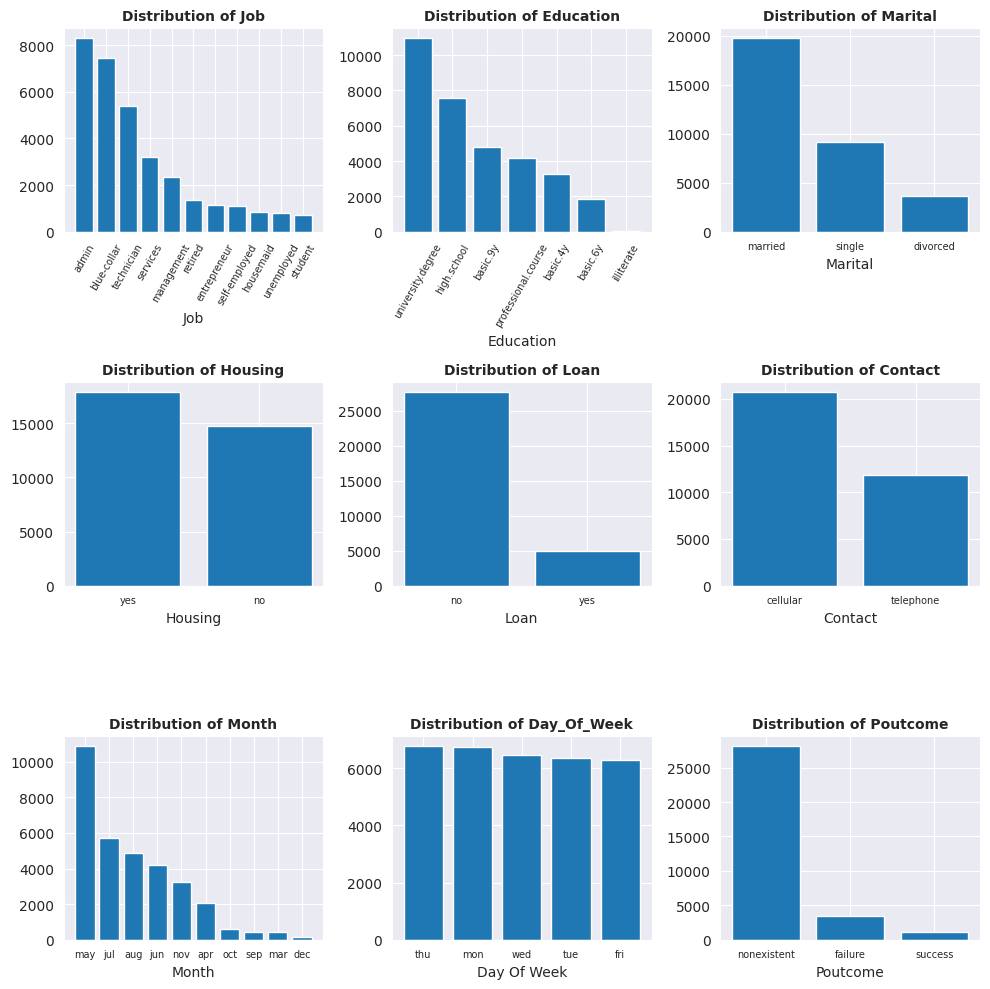

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = ax.flatten()

set_ax1, set_ax2, set_ax3 = (ax1, 'job'), (ax2, 'education'), (ax3, 'marital')
set_ax4, set_ax5, set_ax6 = (ax4, 'housing'), (ax5, 'loan'), (ax6, 'contact')
set_ax7, set_ax8, set_ax9 = (ax7, 'month'), (ax8, 'day_of_week'), (ax9, 'poutcome')
list_axis = [set_ax1, set_ax2, set_ax3, set_ax4, set_ax5, set_ax6, set_ax7, set_ax8, set_ax9]

for axis, col in list_axis:
  axis.bar(bank[col].value_counts().index, bank[col].value_counts().values)
  axis.set_title(f'Distribution of {col.title()}', fontdict={'fontsize':10, 'weight':'bold'})
  axis.set_xlabel(col.title().replace('_', ' '))
  axis.set_xticks(ticks=range(len(bank[col].value_counts().index)),
                  labels=bank[col].value_counts().index,
                  fontdict={'fontsize':7}, rotation=60 if (col == 'job')|(col == 'education') else 0)

plt.tight_layout()
plt.show()

- Most popular occupation among campaign participants is admin.
- Majority of campaign participants have a university degree level of education.
- Campaign participants are predominantly married customers.
- Most campaign participants have housing loans, but the majority do not have personal loans.
- Contact during the campaign is mostly done using cellular communication.
- The highest campaign activity occurs in May.
- Campaign execution takes place on weekdays (Monday to Friday) with even distribution.
- The majority of previous campaign outcomes are not available, indicating that most participants are new to the campaign.

### **Bivariate Analysis**

**How does the customer's age preference affect his or her opportunity to subscribe to a term deposit?**

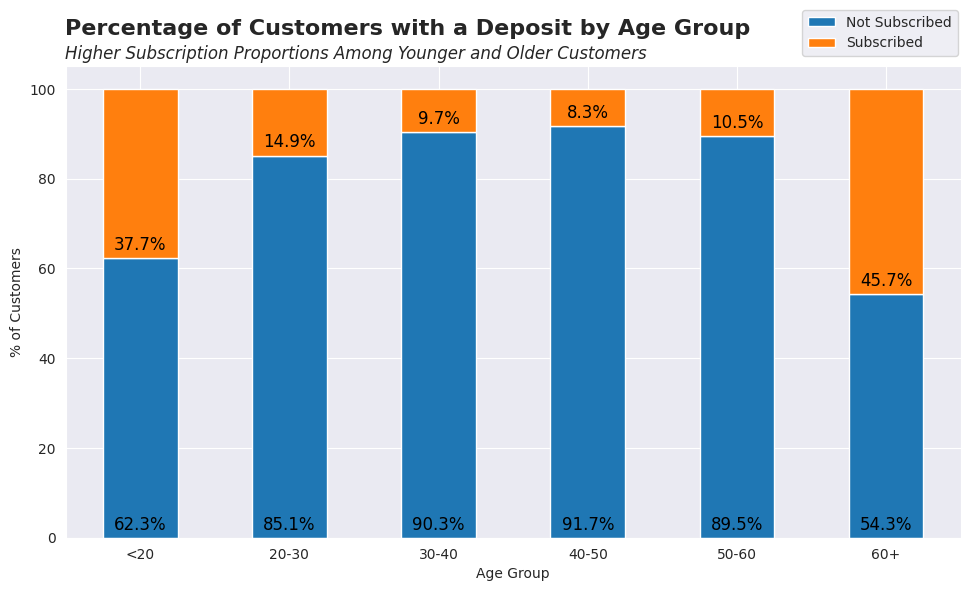

In [28]:
bins_age = [0, 20, 30, 40, 50, 60, np.inf]
labels_age = ['<20','20-30', '30-40', '40-50', '50-60','60+']
bank['age_group'] = pd.cut(bank['age'], bins=bins_age, labels=labels_age)

df_age = bank.groupby('age_group')['y'].value_counts()
df_age_percentage = (df_age / df_age.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_age_percentage.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Age Group')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Age Group", fontsize=16, fontweight='bold')
plt.figtext(0.07, 0.895, "Higher Subscription Proportions Among Younger and Older Customers",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

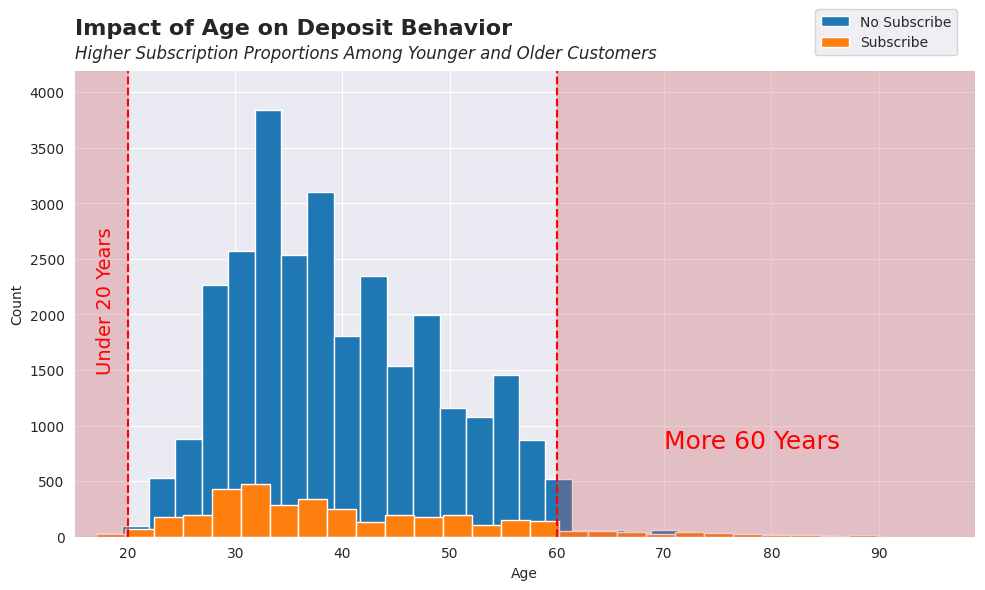

In [29]:
plt.figure(figsize=(10,6))

plt.hist(data=bank[bank['y']=='no'], x='age', bins=30)
plt.hist(data=bank[bank['y']=='yes'], x='age', bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(15, 99)
plt.ylim(0,4200)

plt.legend(['No Subscribe', 'Subscribe'], loc=2, bbox_to_anchor=(0.815, 1.145))

plt.figtext(0.08, 0.935, "Impact of Age on Deposit Behavior", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Higher Subscription Proportions Among Younger and Older Customers",
            fontsize=12, style='italic')

plt.axvline(20, ls='--', color='red')
plt.text(x=17, y=1500, s='Under 20 Years', fontsize=14, color='red', rotation=90)
plt.stackplot(np.arange(0,21,1), [[4200]], color='indianred', alpha=0.3)

plt.axvline(60, ls='--', color='red')
plt.text(x=70, y=800, s='More 60 Years', fontsize=18, color='red', rotation=0)
plt.stackplot(np.arange(60,100,1), [[4200]], color='indianred', alpha=0.3)

plt.tight_layout()
plt.show()

**Generally, customers who decide to subscribe to term deposits from this campaign have what occupation?**

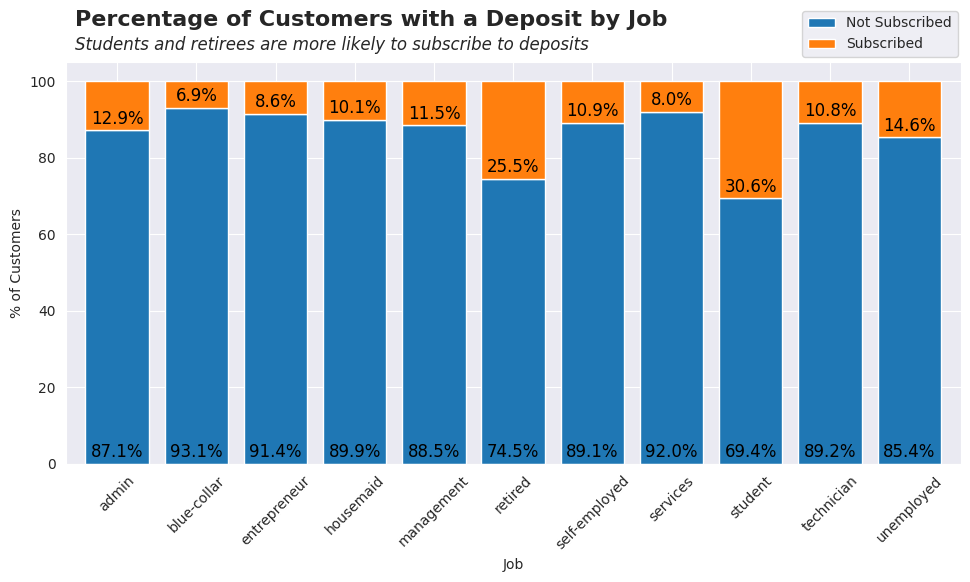

In [30]:
df_job = bank.groupby('job')['y'].value_counts()
df_percentage = (df_job / df_job.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Job')
plt.ylabel('% of Customers')
plt.xticks(rotation=45)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Job", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Students and retirees are more likely to subscribe to deposits",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.145))
plt.tight_layout()
plt.show()

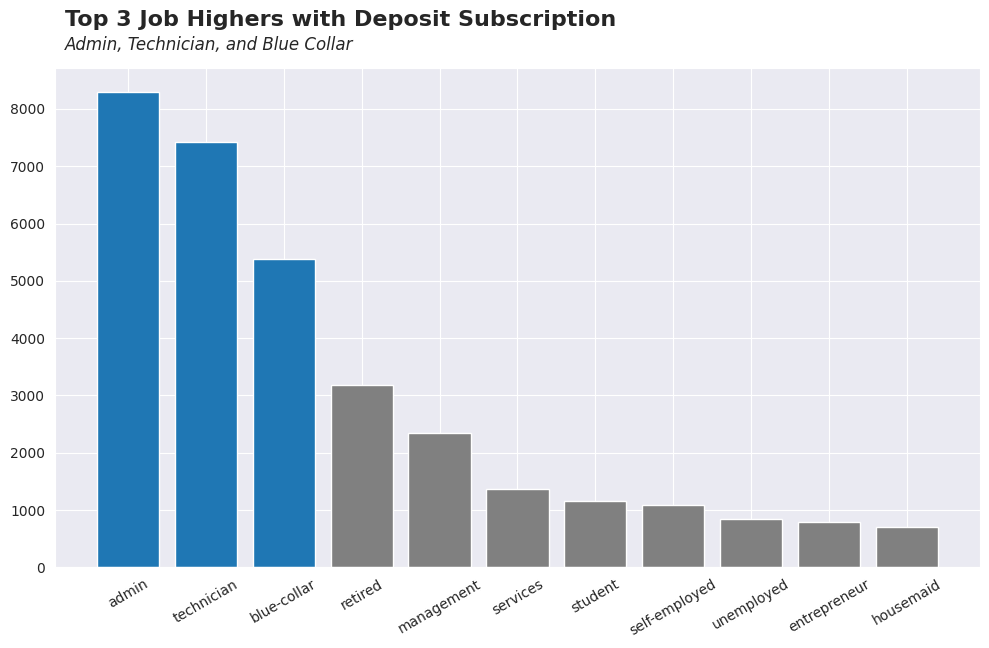

In [31]:
plt.figure(figsize=(10,6))

top_3_jobs = bank[bank['y'] == 'yes']['job'].value_counts().nlargest(3).index
colors = ['#808080' if job not in top_3_jobs else '#1f77b4'
          for job in bank[bank['y'] == 'yes']['job'].value_counts().index]
plt.bar(bank[bank['y'] == 'yes']['job'].value_counts().index, bank['job'].value_counts().values, color=colors)
plt.xticks(rotation=30)

plt.figtext(0.07, 1.045, "Top 3 Job Highers with Deposit Subscription", fontsize=16, fontweight='bold')
plt.figtext(0.07, 1.005, "Admin, Technician, and Blue Collar",
            fontsize=12, style='italic')

plt.tight_layout()
plt.show()

**Are customers with married marital status more likely to subscribe to term deposits?**

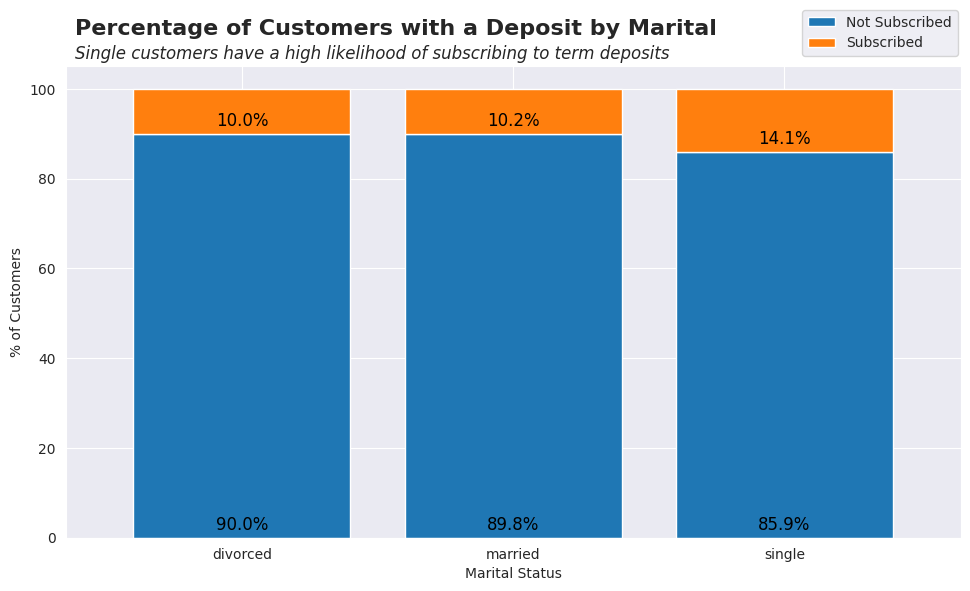

In [32]:
df_marital = bank.groupby('marital')['y'].value_counts()
df_percentage = (df_marital / df_marital.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Marital Status')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Marital", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Single customers have a high likelihood of subscribing to term deposits",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

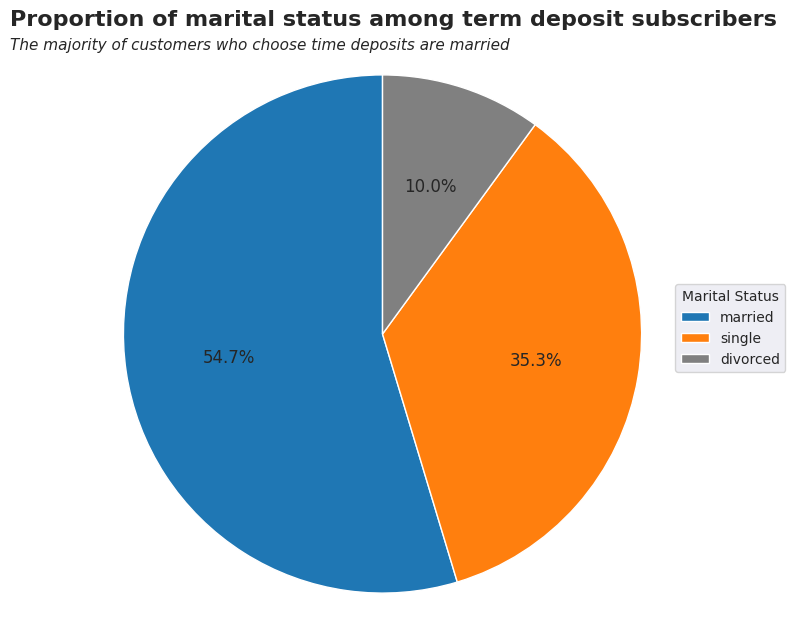

In [33]:
subscribed = bank[bank['y'] == 'yes']
marital_counts = subscribed['marital'].value_counts()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(marital_counts, labels=None,
                                    autopct='%1.1f%%', startangle=90,
                                    colors=['#1f77b4', '#ff7f0e', '#808080'])

plt.figtext(0, 1.015, "Proportion of marital status among term deposit subscribers", fontsize=16, fontweight='bold')
plt.figtext(0, 0.975, "The majority of customers who choose time deposits are married",
            fontsize=11, style='italic')

plt.axis('equal')
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.legend(wedges, marital_counts.index, title='Marital Status',
           bbox_to_anchor=(0.90, 0.60),
           fontsize=10)

plt.tight_layout()
plt.show()

**Are there differences in education levels in customers' decisions to subscribe to term deposits?**

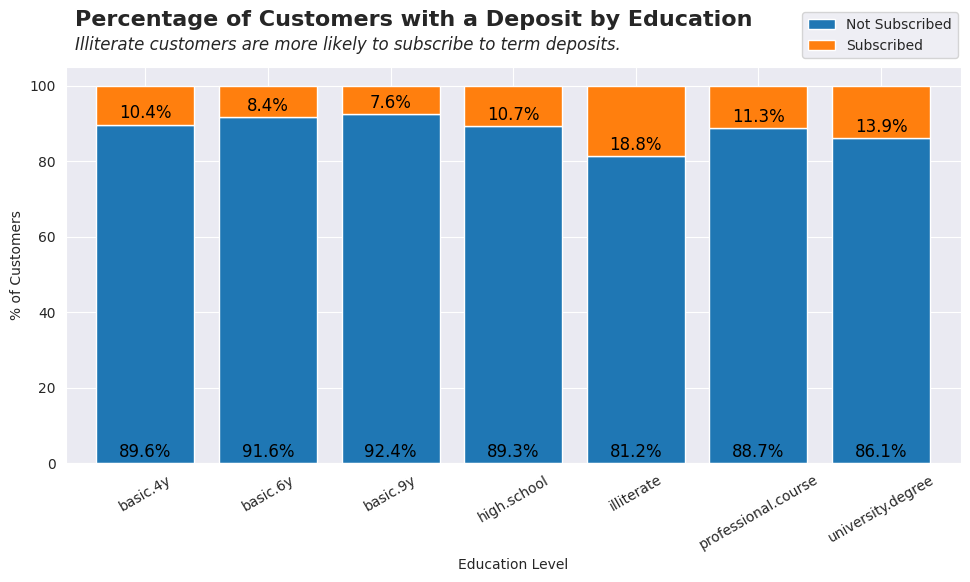

In [34]:
df_education = bank.groupby('education')['y'].value_counts()
df_percentage = (df_education / df_education.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Education Level')
plt.ylabel('% of Customers')
plt.xticks(rotation=30)
plt.figtext(0.08, 0.935, "Percentage of Customers with a Deposit by Education", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Illiterate customers are more likely to subscribe to term deposits.",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

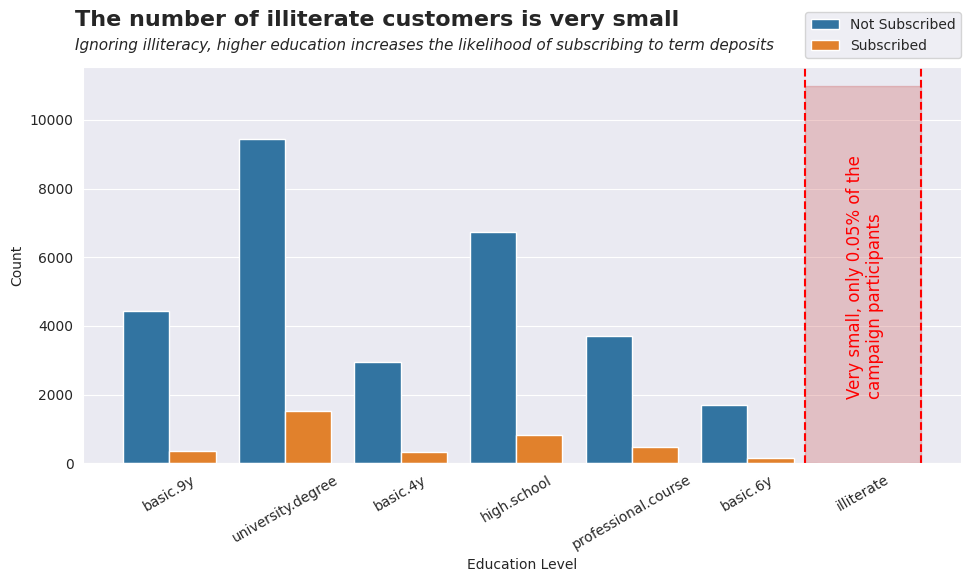

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=bank, x='education', hue='y')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.figtext(0.08, 0.935, "The number of illiterate customers is very small", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "Ignoring illiteracy, higher education increases the likelihood of subscribing to term deposits",
            fontsize=11, style='italic')

plt.xticks(rotation=30)

plt.axvline(5.5, ls='--', color='red')
plt.axvline(6.5, ls='--', color='red')
plt.text(x=5.85, y=2000, s=f"Very small, only {round(bank['education'].value_counts(normalize=True).loc['illiterate']*100, 2)}% of the\ncampaign participants",
         fontsize=12, color='red', rotation=90)
plt.stackplot(np.arange(5.5,7.5,1), [[11000]], color='indianred', alpha=0.3)

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

**Are customers who have a housing loan (KPR) or have a personal loan more likely to subscribe to a term deposit? how does it affect?**

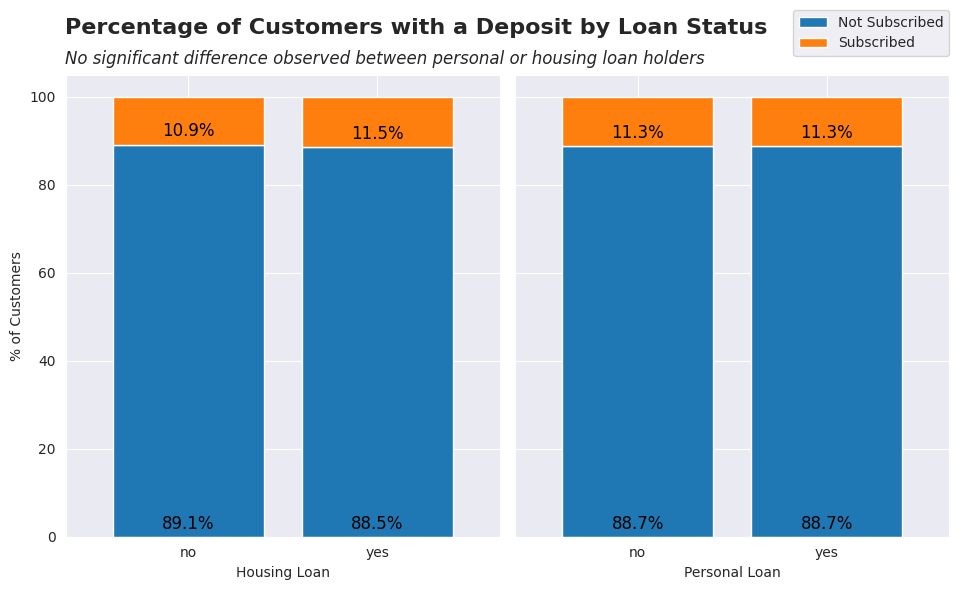

In [36]:
df_housing = bank.groupby(['housing'])['y'].value_counts()
df_loan = bank.groupby('loan')['y'].value_counts()
df_housing_percentage = (df_housing / df_housing.groupby(level=0).sum()) * 100
df_loan_percentage = (df_loan / df_loan.groupby(level=0).sum()) * 100

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
df_housing_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax1)
df_loan_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax2)
ax1.set(xlabel='Housing Loan', ylabel='% of Customers')
ax2.set(xlabel='Personal Loan')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Loan Status", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "No significant difference observed between personal or housing loan holders",
            ha='center', fontsize=12, style='italic')

for ax in [ax1, ax2]:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                        ha='center', va='center',
                        xytext=(0, 0),
                        textcoords='offset points',
                        fontsize=12,
                        color='black')

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.625, 1.155))
plt.tight_layout()
plt.show()

**How does the timing of the campaign, such as the day of the week, affect customers' decisions to subscribe or not? does it have any influence? then what about the month?**

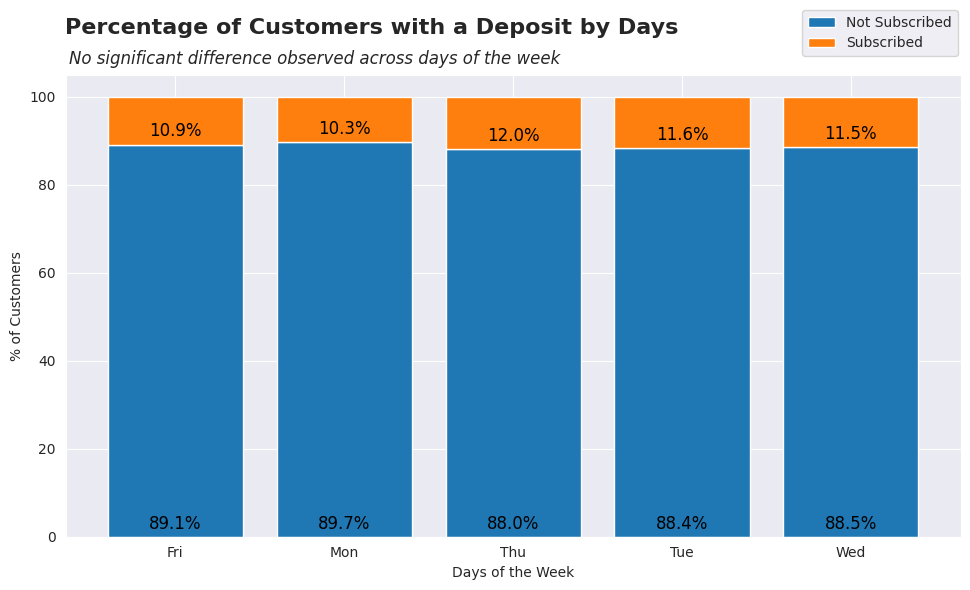

In [37]:
df_day = bank.groupby('day_of_week')['y'].value_counts()
df_percentage = (df_day / df_day.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Days of the Week')
plt.ylabel('% of Customers')
ax.set_xticks(range(len(df_day.unstack().index)))
ax.set_xticklabels(df_day.unstack().index.str.title(), rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Days", fontsize=16, fontweight='bold')
plt.figtext(0.32, 0.885, "No significant difference observed across days of the week",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

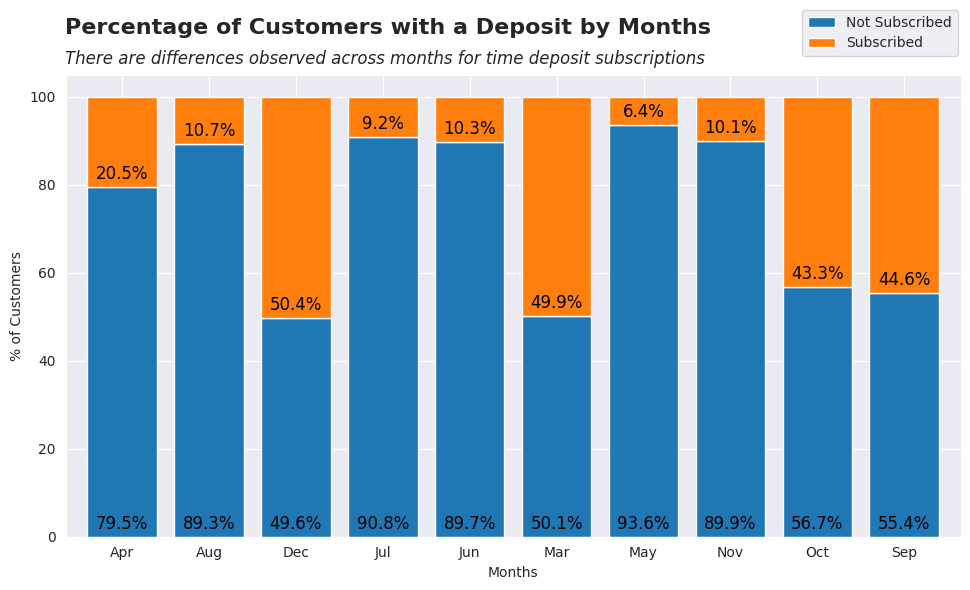

In [38]:
df_month = bank.groupby('month')['y'].value_counts()
df_percentage = (df_month / df_month.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Months')
plt.ylabel('% of Customers')
ax.set_xticks(range(len(df_month.unstack().index)))
ax.set_xticklabels(df_month.unstack().index.str.title(), rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Months", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "There are differences observed across months for time deposit subscriptions",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

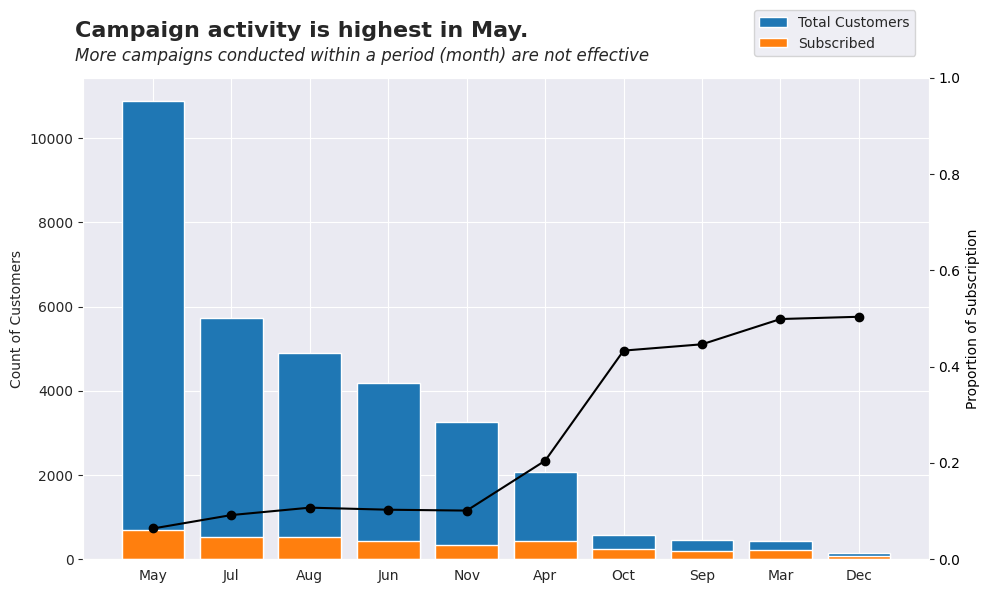

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(bank['month'].value_counts().index, bank['month'].value_counts().values)
ax.bar(bank['month'].value_counts().index, bank[bank['y']=='yes']['month'].value_counts().loc[bank['month'].value_counts().index].values)
ax.set_ylabel('Count of Customers')
ax.set_xticks(range(len(bank['month'].value_counts().index)))
ax.set_xticklabels(bank['month'].value_counts().index.str.title(), rotation=0)
plt.legend(['Total Customers', 'Subscribed'], loc=2, bbox_to_anchor=(0.785, 1.155))

ax_prop = ax.twinx()
prop_yes = bank.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'].loc[bank['month'].value_counts().index]
ax_prop.plot(bank['month'].value_counts().index, prop_yes, marker='o', color='black')
ax_prop.set_ylabel('Proportion of Subscription', color='black')
ax_prop.set_ylim(0, 1)
ax_prop.tick_params(axis='y', labelcolor='black')
ax_prop.grid(False)

plt.figtext(0.08, 0.935, "Campaign activity is highest in May.", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "More campaigns conducted within a period (month) are not effective",
            fontsize=12, style='italic')

plt.tight_layout()
plt.show()

In [40]:
bank[bank['y'] == 'yes']['month'].value_counts()

month
may    696
jul    525
aug    524
jun    431
apr    425
nov    329
oct    250
mar    215
sep    204
dec     71
Name: count, dtype: int64

**How does the last duration and number of times carried out during this contact campaign influence the customer's decision to subscribe to a term deposit?**

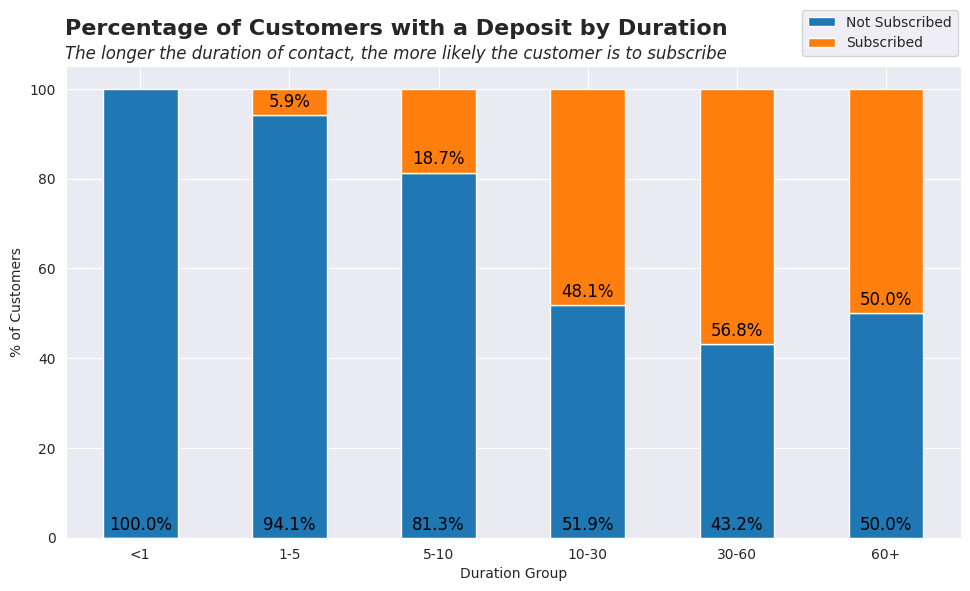

In [41]:
bank['duration_minute'] = round(bank['duration'] / 60, 2)
bins_duration = [0, 1, 5, 10, 30, 60, np.inf]
labels_duration = ['<1', '1-5', '5-10', '10-30', '30-60', '60+']
bank['duration_group'] = pd.cut(bank['duration_minute'], bins=bins_duration, labels=labels_duration)

df_age = bank.groupby('duration_group')['y'].value_counts()
df_age_percentage = (df_age / df_age.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_age_percentage.unstack().plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Duration Group')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by Duration", fontsize=16, fontweight='bold')
plt.figtext(0.07, 0.895, "The longer the duration of contact, the more likely the customer is to subscribe",
            fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))
plt.tight_layout()
plt.show()

In [42]:
bank['duration_group'].value_counts()

duration_group
1-5      20375
5-10      6143
<1        3370
10-30     2642
30-60       81
60+          4
Name: count, dtype: int64

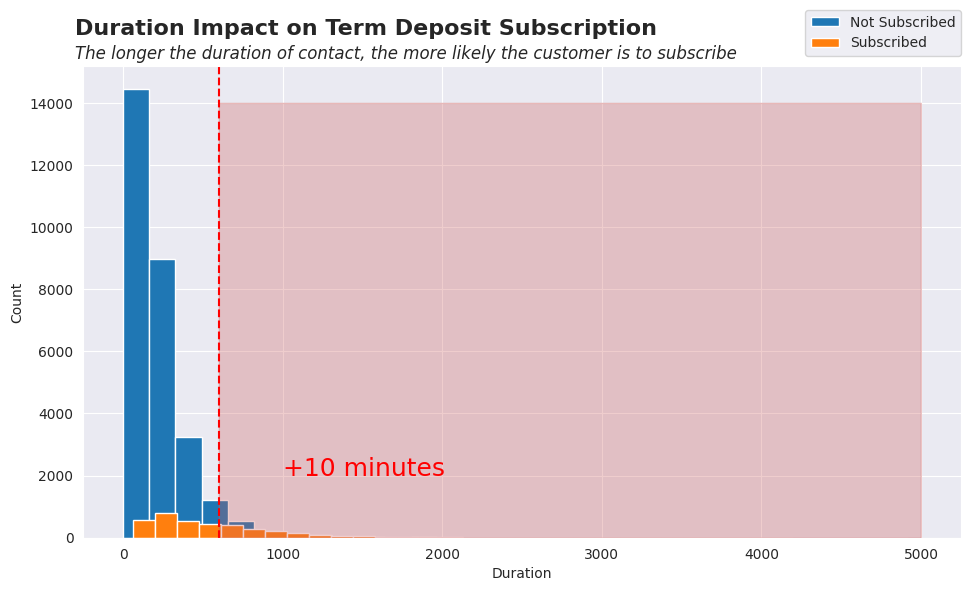

In [43]:
plt.figure(figsize=(10,6))

plt.hist(data=bank[bank['y']=='no'], x='duration', bins=30)
plt.hist(data=bank[bank['y']=='yes'], x='duration', bins=30)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.135))

plt.figtext(0.08, 0.935, "Duration Impact on Term Deposit Subscription", fontsize=16, fontweight='bold')
plt.figtext(0.08, 0.895, "The longer the duration of contact, the more likely the customer is to subscribe",
            fontsize=12, style='italic')

plt.axvline(600, ls='--', color='red')
plt.text(x=1000, y=2000, s='+10 minutes', fontsize=18, color='red', rotation=0)
plt.stackplot(np.arange(600,5000,1), [[14000]], color='indianred', alpha=0.3)

plt.tight_layout()
plt.show()

**How do the results of previous campaigns influence the success of the current campaign, namely term deposits?**

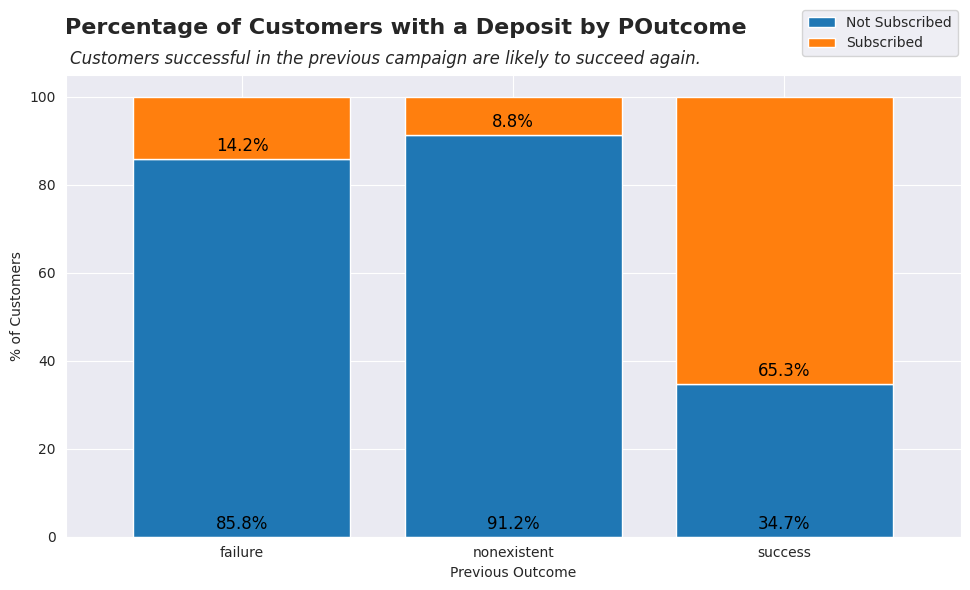

In [44]:
df_poutcome = bank.groupby('poutcome')['y'].value_counts()
df_percentage = (df_poutcome / df_poutcome.groupby(level=0).sum()) * 100

fig, ax = plt.subplots(figsize=(10, 6))
df_percentage.unstack().plot(kind='bar', stacked=True, width=0.8, ax=ax)
plt.xlabel('Previous Outcome')
plt.ylabel('% of Customers')
plt.xticks(rotation=0)
plt.figtext(0.07, 0.935, "Percentage of Customers with a Deposit by POutcome", fontsize=16, fontweight='bold')
plt.figtext(0.39, 0.885, "Customers successful in the previous campaign are likely to succeed again.",
            ha='center', fontsize=12, style='italic')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 3.),
                    ha='center', va='center',
                    xytext=(0, 0),
                    textcoords='offset points',
                    fontsize=12,
                    color='black')

plt.legend(['Not Subscribed', 'Subscribed'], loc=2, bbox_to_anchor=(0.815, 1.155))
plt.tight_layout()
plt.show()

### **Multivariate Analysis**

In [45]:
num_col = ['age', 'duration', 'duration_minute', 'campaign', 'pdays', 'previous', 'y']
bank['y'] = bank['y'].map({'yes':1, 'no':0})

<Figure size 1000x800 with 0 Axes>

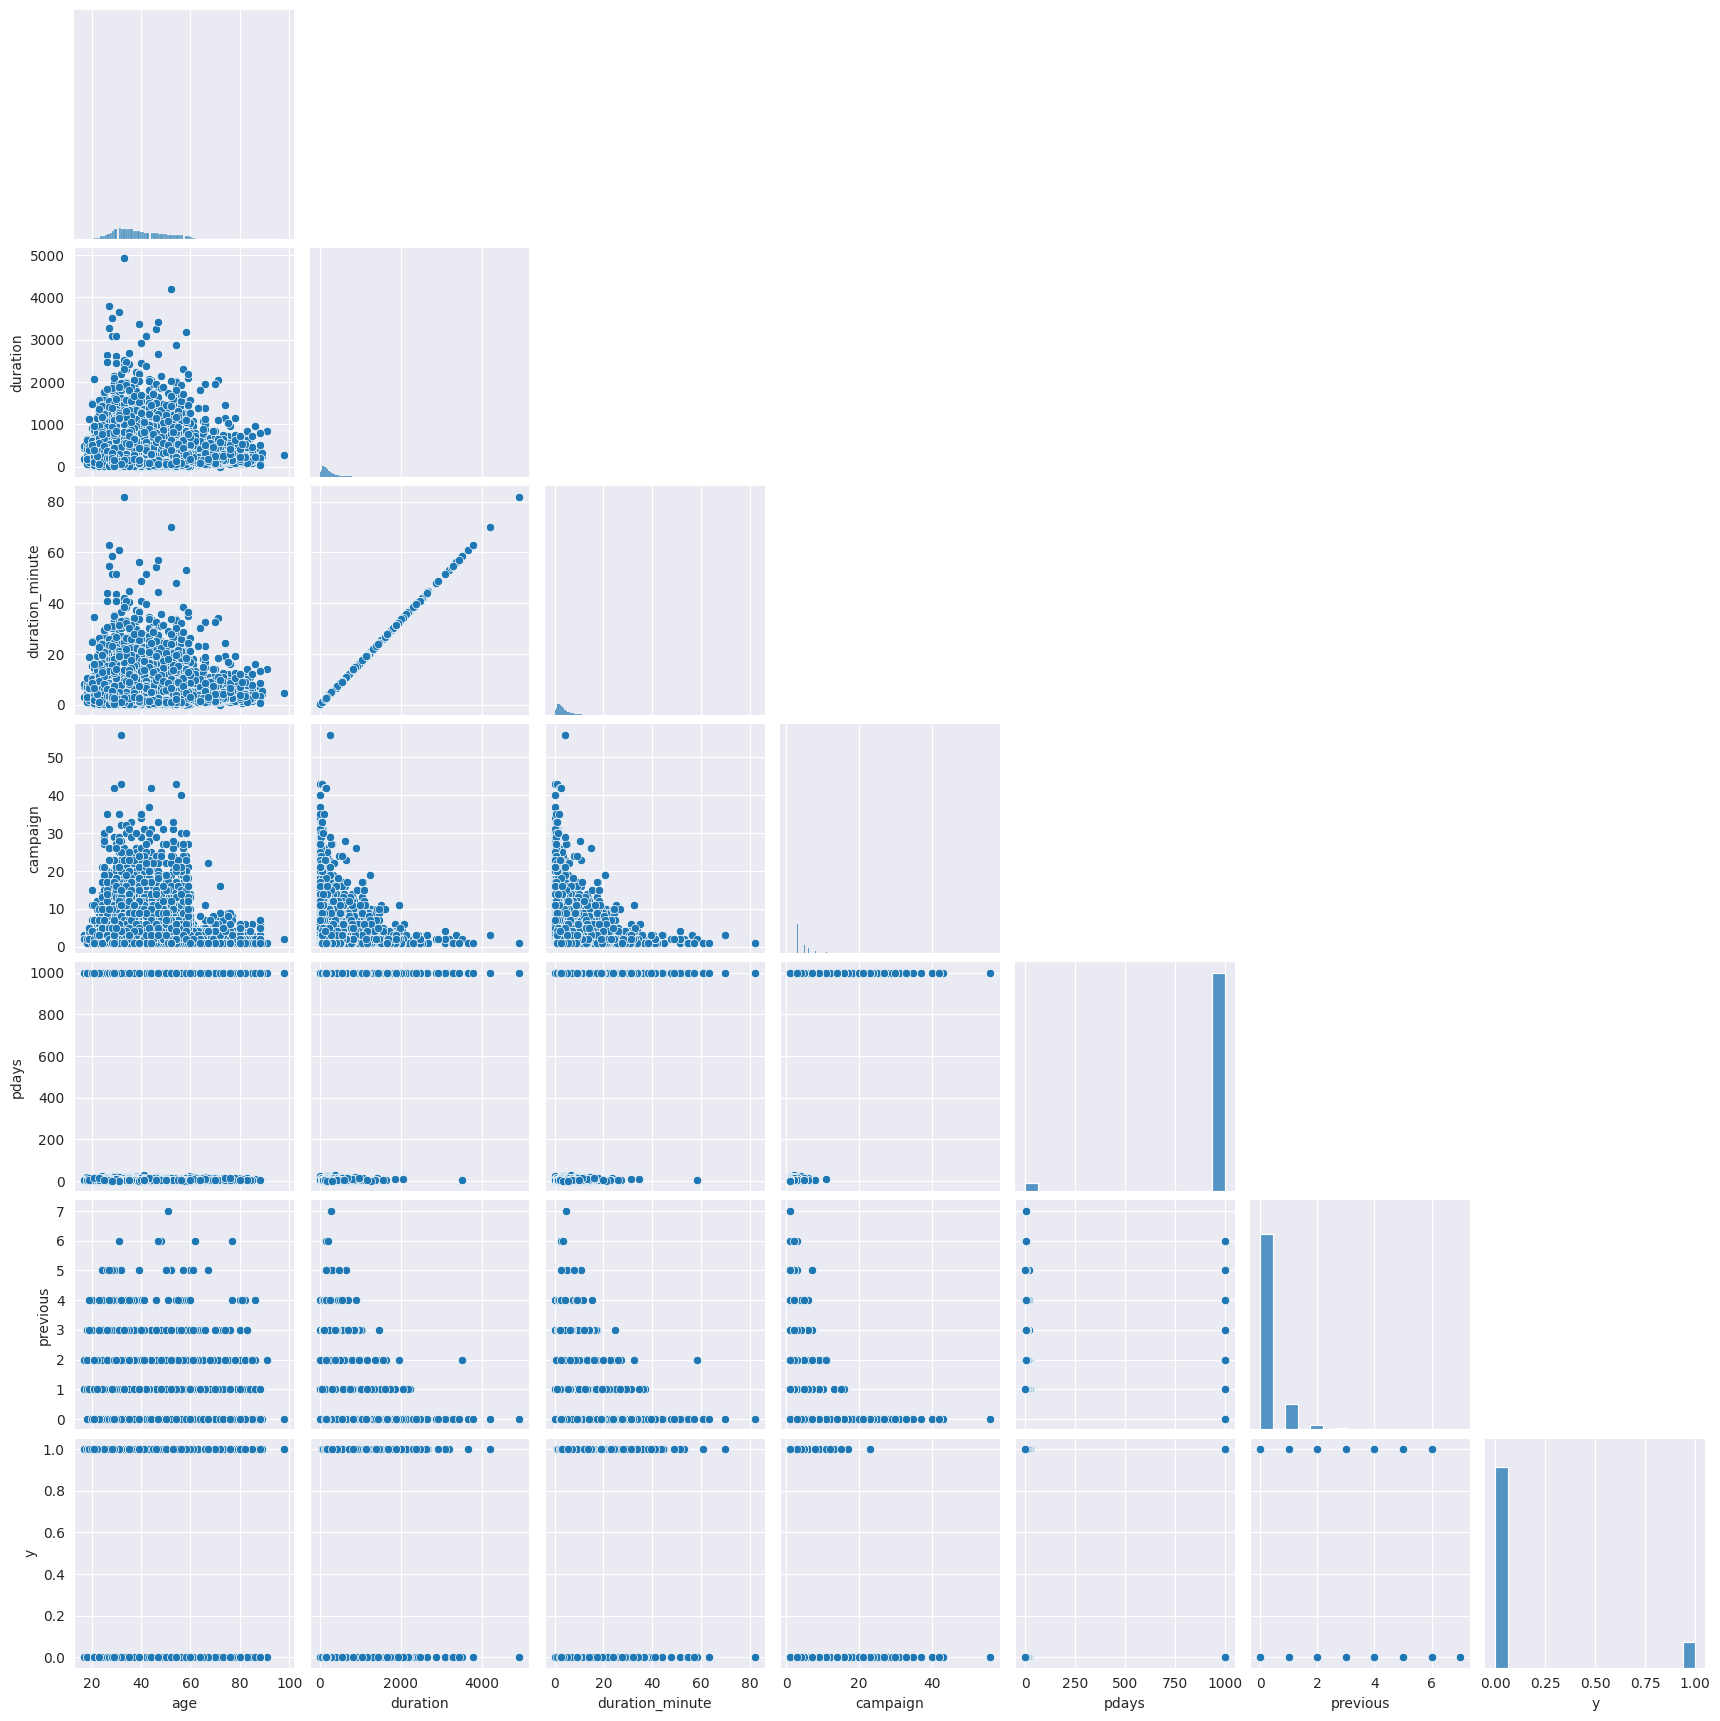

In [46]:
plt.figure(figsize=(10,8))
sns.pairplot(bank[num_col], corner=True)
plt.show()

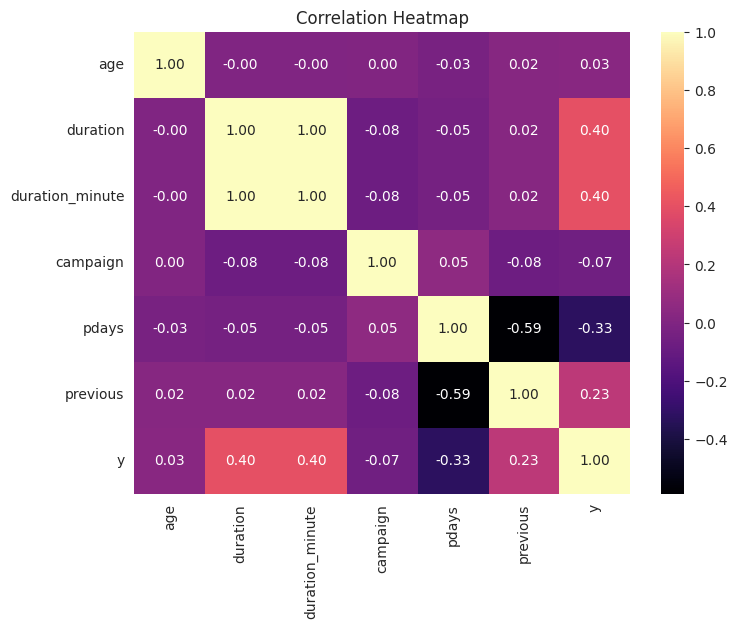

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(bank[num_col].corr(), annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **Statistical Analysis**

In [48]:
alpha = 0.05
statistic = pd.DataFrame(columns=['feature','p_value'])
numerical_col = bank.loc[:, bank.columns.values].select_dtypes(include=['int64', 'float64']).columns.values
categorical_col = bank.loc[:, bank.columns.values].select_dtypes(include=['object', 'category']).columns.values

def contingency_table(index, column, data=bank):
  observed = []
  contingency_table = pd.pivot_table(data=data, index=index,columns=column, aggfunc='size')
  contingency_table.columns.name = None

  default_customers = contingency_table.loc[1].to_list()
  observed.append(default_customers)

  non_default_customers = contingency_table.loc[0].to_list()
  observed.append(non_default_customers)

  return observed

**t-test**

In [49]:
for col in numerical_col:
    group1 = bank[bank['y'] == bank['y'].unique()[0]][col]
    group2 = bank[bank['y'] == bank['y'].unique()[1]][col]
    rest = ttest_ind(group1, group2)
    assign = pd.DataFrame({'feature':[col],'p_value':[rest.pvalue]})
    statistic = pd.concat([statistic, assign], ignore_index=True)
    print(col.title().replace('_', ' '))
    print(rest.pvalue)

    if rest.pvalue < alpha:
        print('There is sufficient evidence to reject the null hypothesis')
        print(f'There is a significant relationship between {col} and term deposit subscription \n')
    else:
        print('There is insufficient evidence to reject the null hypothesis')
        print(f'There is no significant relationship between {col} and term deposit subscription \n')

Age
2.7199218671243055e-07
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between age and term deposit subscription 

Duration
0.0
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between duration and term deposit subscription 

Campaign
2.808948661293384e-32
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between campaign and term deposit subscription 

Pdays
0.0
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between pdays and term deposit subscription 

Previous
0.0
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between previous and term deposit subscription 

Y
0.0
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between y and term deposit subscription 

Duration Minute
0.0
There is sufficient evidence to

**chi-squared**

In [50]:
for col in categorical_col:
    obs = contingency_table('y', col)
    rest = chi2_contingency(obs)
    assign = pd.DataFrame({'feature': [col], 'p_value': [rest.pvalue]})
    statistic = pd.concat([statistic, assign], ignore_index=True)
    print(col.title().replace('_', ' '))
    print(rest.pvalue)

    if rest.pvalue < alpha:
        print('There is sufficient evidence to reject the null hypothesis')
        print(f'There is a significant relationship between {col} and term deposit subscription \n')
    else:
        print('There is insufficient evidence to reject the null hypothesis')
        print(f'There is no significant relationship between {col} and term deposit subscription \n')

Job
1.2946887208690223e-156
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between job and term deposit subscription 

Marital
2.865156217286518e-23
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between marital and term deposit subscription 

Education
7.805907818052041e-32
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between education and term deposit subscription 

Housing
0.07431823784225969
There is insufficient evidence to reject the null hypothesis
There is no significant relationship between housing and term deposit subscription 

Loan
1.0
There is insufficient evidence to reject the null hypothesis
There is no significant relationship between loan and term deposit subscription 

Contact
8.171661259845619e-147
There is sufficient evidence to reject the null hypothesis
There is a significant relationship between contact and term deposi

In [51]:
statistic['result'] = ['keep' if p < alpha else 'drop' for p in statistic['p_value']]
statistic.sort_values(by='p_value', ascending=True)

,feature,p_value,result
17,duration_group,0.000000e+00,keep
1,duration,0.000000e+00,keep
3,pdays,0.000000e+00,keep
4,previous,0.000000e+00,keep
5,y,0.000000e+00,keep
6,duration_minute,0.000000e+00,keep
15,poutcome,0.000000e+00,keep
13,month,0.000000e+00,keep
16,age_group,5.936914e-236,keep
7,job,1.294689e-156,keep


After knowing the results of the above EDA, to achieve good results, the following steps are needed:

- Removing features loan and housing to their lack of statistically significant relationship with the target feature.
- Removing month and day_of_week, even though they statistically have an influence, can introduce seasonal or temporal bias that may not be desired in long-term predictions.
- Removing duration in second, duration_group, and age group to avoid multicollinearity.
- Performing encoding on features job, marital, education, contact, and poutcome.
- Due to skewed data distribution and presence of very large and small values, standardization is necessary.

## **Feature Engineering**

In [52]:
drop_col = ['loan', 'housing', 'month', 'day_of_week', 'duration', 'duration_group', 'age_group']

bank = bank.drop(drop_col, axis=1)
bank.sample(5)

,age,job,marital,education,contact,campaign,pdays,previous,poutcome,y,duration_minute
3697,29,admin,single,high.school,cellular,11,999,0,nonexistent,0,1.12
3403,25,blue-collar,single,high.school,telephone,3,999,0,nonexistent,0,20.20
31354,40,entrepreneur,divorced,university.degree,cellular,2,999,0,nonexistent,0,5.42
26149,24,technician,single,professional.course,cellular,1,999,1,failure,0,2.92
649,36,admin,married,university.degree,cellular,2,999,0,nonexistent,0,8.43


### **Encoding Categorical Features**

In [53]:
dummies_col = [
'job', 'marital',
'education',
'contact', 'poutcome']
list_dummies = []

for col in dummies_col:
  list_dummies.append(pd.get_dummies(bank[col], prefix=col, prefix_sep=':'))

pd.options.display.max_columns = None
bank_dummies = pd.concat(list_dummies, axis=1)
bank_dummies.columns.values

array(['job:admin', 'job:blue-collar', 'job:entrepreneur',
       'job:housemaid', 'job:management', 'job:retired',
       'job:self-employed', 'job:services', 'job:student',
       'job:technician', 'job:unemployed', 'marital:divorced',
       'marital:married', 'marital:single', 'education:basic.4y',
       'education:basic.6y', 'education:basic.9y',
       'education:high.school', 'education:illiterate',
       'education:professional.course', 'education:university.degree',
       'contact:cellular', 'contact:telephone', 'poutcome:failure',
       'poutcome:nonexistent', 'poutcome:success'], dtype=object)

In [54]:
bank_dummies['education:basic'] = bank_dummies['education:basic.9y'] + bank_dummies['education:basic.6y'] + bank_dummies['education:basic.4y']
bank_dummies.drop(['education:basic.9y', 'education:basic.6y', 'education:basic.4y'], axis=1, inplace=True)

bank_dummies = bank_dummies.astype(int)
bank_dummies.sample(5)

,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,marital:divorced,marital:married,marital:single,education:high.school,education:illiterate,education:professional.course,education:university.degree,contact:cellular,contact:telephone,poutcome:failure,poutcome:nonexistent,poutcome:success,education:basic
14306,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0
32199,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4525,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
19279,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
16989,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0


In [55]:
bank = pd.concat([bank, bank_dummies], axis=1)
bank.drop(dummies_col, axis=1, inplace=True)
bank.sample(5)

,age,campaign,pdays,previous,y,duration_minute,job:admin,job:blue-collar,job:entrepreneur,job:housemaid,job:management,job:retired,job:self-employed,job:services,job:student,job:technician,job:unemployed,marital:divorced,marital:married,marital:single,education:high.school,education:illiterate,education:professional.course,education:university.degree,contact:cellular,contact:telephone,poutcome:failure,poutcome:nonexistent,poutcome:success,education:basic
27988,33,1,999,0,1,3.53,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
14611,38,1,999,0,1,18.22,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
6360,53,1,999,0,0,2.37,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
15992,54,10,999,0,0,1.98,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1111,42,1,999,0,0,1.70,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1


### **Train Test Split Data**

In [57]:
X = bank.drop('y', axis=1)
y = bank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_validation shape: {y_validation.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (19571, 29)
X_validation shape: (6524, 29)
X_test shape: (6524, 29)
y_train shape: (19571,)
y_validation shape: (6524,)
y_test shape: (6524,)


Now, we have the variables X_train, X_validation, X_test, y_train, y_validation, and y_test with the appropriate dimensions.

### **Feature Selection**

In [58]:
X_train.columns.values

array(['age', 'campaign', 'pdays', 'previous', 'duration_minute',
       'job:admin', 'job:blue-collar', 'job:entrepreneur',
       'job:housemaid', 'job:management', 'job:retired',
       'job:self-employed', 'job:services', 'job:student',
       'job:technician', 'job:unemployed', 'marital:divorced',
       'marital:married', 'marital:single', 'education:high.school',
       'education:illiterate', 'education:professional.course',
       'education:university.degree', 'contact:cellular',
       'contact:telephone', 'poutcome:failure', 'poutcome:nonexistent',
       'poutcome:success', 'education:basic'], dtype=object)

In [59]:
selected_features = [
'age', 'campaign', 'pdays', 'previous', 'duration_minute',
'job:admin', 'job:blue-collar', 'job:entrepreneur',
'job:housemaid', 'job:management', 'job:retired',
'job:self-employed', 'job:services', 'job:student',
'job:technician', 'job:unemployed', 'marital:divorced',
'marital:married', 'marital:single', 'education:basic',
'education:high.school', 'education:illiterate',
'education:professional.course', 'education:university.degree',
'contact:cellular', 'contact:telephone', 'poutcome:failure',
'poutcome:nonexistent', 'poutcome:success']

ref_categorical = [
'job:blue-collar',
'marital:divorced',
'education:illiterate',
'poutcome:nonexistent',
'contact:telephone']

In [60]:
X_train = X_train.loc[:, selected_features]
X_validation = X_validation.loc[:, selected_features]
X_test = X_test.loc[:, selected_features]

X_train.drop(ref_categorical, axis=1, inplace=True)
X_validation.drop(ref_categorical, axis=1, inplace=True)
X_test.drop(ref_categorical, axis=1, inplace=True)

print(f'X_train shape: {X_train.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (19571, 24)
X_validation shape: (6524, 24)
X_test shape: (6524, 24)


### **VIF: Multikolinearity for Numerical Features**

In [61]:
X = add_constant(X_train[['age', 'duration_minute', 'campaign', 'pdays', 'previous']])

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

          Features        VIF
0            const  64.020185
1              age   1.001143
2  duration_minute   1.008871
3         campaign   1.012953
4            pdays   1.513517
5         previous   1.515009


### **SMOTE: Imbalance Data**

In [62]:
y_train.value_counts()

y
0    17353
1     2218
Name: count, dtype: int64

It is known that there is a significant imbalance in the target feature in the training data, between customers who subscribe to deposits and those who do not. Based on the data, the number of subscribing customers is fewer, categorizing it as the minority class. Therefore, it is necessary to perform oversampling by adding synthetic data to the minority class or undersampling by reducing the majority class data to balance the dataset.

In [63]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(y_train_sm.value_counts())

y
0    17353
1    17353
Name: count, dtype: int64


### **Standarization Numerical Features**

In [64]:
scaler = StandardScaler()
X_train_sm[:] = scaler.fit_transform(X_train_sm[:])

X_validation[:] = scaler.transform(X_validation[:])
X_test[:] = scaler.transform(X_test[:])

X_train_sm.describe().loc[['mean', 'std']].T

,mean,std
age,-1.076890e-16,1.000014
campaign,-1.310285e-16,1.000014
pdays,-1.310285e-17,1.000014
previous,6.551423e-18,1.000014
duration_minute,3.930854e-17,1.000014
job:admin,7.861707e-17,1.000014
job:entrepreneur,-1.474070e-17,1.000014
job:housemaid,-9.827134e-18,1.000014
job:management,-1.637856e-18,1.000014
job:retired,7.165619e-17,1.000014


## **Modelling**

In [78]:
def training_model(model, X, y, result=None):
    if result is None:
        result = pd.DataFrame()

    model_name = type(model).__name__ + ' - Train'
    model.fit(X, y)

    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

    result.loc[model_name, 'Accuracy'] = cv_results['test_accuracy'].mean()
    result.loc[model_name, 'Precision'] = cv_results['test_precision'].mean()
    result.loc[model_name, 'Recall'] = cv_results['test_recall'].mean()
    result.loc[model_name, 'F1 Score'] = cv_results['test_f1'].mean()
    result.loc[model_name, 'ROC AUC Score'] = cv_results['test_roc_auc'].mean()

    return result

def evaluation_model(model, X, y, result):
    model_name = type(model).__name__ + ' - Validation'
    y_pred = model.predict(X)

    result.loc[model_name, 'Accuracy'] = accuracy_score(y, y_pred)
    result.loc[model_name, 'Precision'] = precision_score(y, y_pred)
    result.loc[model_name, 'Recall'] = recall_score(y, y_pred)
    result.loc[model_name, 'F1 Score'] = f1_score(y, y_pred)
    result.loc[model_name, 'ROC AUC Score'] = roc_auc_score(y, model.predict_proba(X)[:,1])

    return result

### **Logistic Regression**

In [79]:
logreg_model = LogisticRegression(class_weight='balanced', random_state=42)

logreg_df = pd.DataFrame()
training_model(logreg_model, X_train_sm, y_train_sm, logreg_df)
evaluation_model(logreg_model, X_validation, y_validation, logreg_df)
logreg_df.T

,LogisticRegression - Train,LogisticRegression - Validation
Accuracy,0.860200,0.867413
Precision,0.891323,0.425229
Recall,0.819691,0.582173
F1 Score,0.850988,0.491476
ROC AUC Score,0.934296,0.835599


In [94]:
model = LogisticRegression(class_weight='balanced', random_state=42)
param_distributions = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

random_search.fit(X_train_sm, y_train_sm)
print(random_search.best_params_)

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 100}


In [95]:
best_logreg = random_search.best_estimator_

logreg_df = pd.DataFrame()
training_model(best_logreg, X_train_sm, y_train_sm, logreg_df)
evaluation_model(best_logreg, X_validation, y_validation, logreg_df)
logreg_df.T

,LogisticRegression - Train,LogisticRegression - Validation
Accuracy,0.860113,0.867566
Precision,0.891232,0.425662
Recall,0.819576,0.582173
F1 Score,0.850878,0.491765
ROC AUC Score,0.934316,0.835570


In [107]:
print(f'Confusion Matrix - {type(best_logreg).__name__} \n',
      confusion_matrix(y_validation, best_logreg.predict(X_validation)), '\n')
print(f'Classification Report - {type(best_logreg).__name__} \n',
      classification_report(y_validation, best_logreg.predict(X_validation)))

Confusion Matrix - LogisticRegression 
 [[5242  564]
 [ 300  418]] 

Classification Report - LogisticRegression 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      5806
           1       0.43      0.58      0.49       718

    accuracy                           0.87      6524
   macro avg       0.69      0.74      0.71      6524
weighted avg       0.89      0.87      0.88      6524



### **Decision Tree**

In [100]:
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

tree_df = pd.DataFrame()
training_model(tree_model, X_train_sm, y_train_sm, tree_df)
evaluation_model(tree_model, X_validation, y_validation, tree_df)
tree_df.T

,DecisionTreeClassifier - Train,DecisionTreeClassifier - Validation
Accuracy,0.885411,0.840895
Precision,0.878333,0.340319
Recall,0.894664,0.474930
F1 Score,0.883552,0.396512
ROC AUC Score,0.885410,0.680496


In [103]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
param_distributions = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

random_search.fit(X_train_sm, y_train_sm)
print(random_search.best_params_)

{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'gini'}


In [104]:
best_tree = random_search.best_estimator_

tree_df = pd.DataFrame()
training_model(best_tree, X_train_sm, y_train_sm, tree_df)
evaluation_model(best_tree, X_validation, y_validation, tree_df)
tree_df.T

,DecisionTreeClassifier - Train,DecisionTreeClassifier - Validation
Accuracy,0.877747,0.849785
Precision,0.876130,0.367140
Recall,0.880026,0.504178
F1 Score,0.874564,0.424883
ROC AUC Score,0.928562,0.782579


In [106]:
print(f'Confusion Matrix - {type(best_tree).__name__} \n',
      confusion_matrix(y_validation, best_tree.predict(X_validation)), '\n')
print(f'Classification Report - {type(best_tree).__name__} \n',
      classification_report(y_validation, best_tree.predict(X_validation)))

Confusion Matrix - DecisionTreeClassifier 
 [[5182  624]
 [ 356  362]] 

Classification Report - DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      5806
           1       0.37      0.50      0.42       718

    accuracy                           0.85      6524
   macro avg       0.65      0.70      0.67      6524
weighted avg       0.87      0.85      0.86      6524



### AdaBoost Model

In [108]:
ada_model = AdaBoostClassifier(random_state=42)

ada_df = pd.DataFrame()
training_model(ada_model, X_train_sm, y_train_sm, ada_df)
evaluation_model(ada_model, X_validation, y_validation, ada_df)
ada_df.T

,AdaBoostClassifier - Train,AdaBoostClassifier - Validation
Accuracy,0.865501,0.851012
Precision,0.876852,0.391081
Recall,0.849599,0.635097
F1 Score,0.861124,0.484076
ROC AUC Score,0.941579,0.856769


In [109]:
model = AdaBoostClassifier(random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

random_search.fit(X_train_sm, y_train_sm)
print(random_search.best_params_)

{'n_estimators': 200, 'learning_rate': 1}


In [110]:
best_ada = random_search.best_estimator_

ada_df = pd.DataFrame()
training_model(best_ada, X_train_sm, y_train_sm, ada_df)
evaluation_model(best_ada, X_validation, y_validation, ada_df)
ada_df.T

,AdaBoostClassifier - Train,AdaBoostClassifier - Validation
Accuracy,0.867835,0.860055
Precision,0.884873,0.408793
Recall,0.845104,0.608635
F1 Score,0.861431,0.489088
ROC AUC Score,0.945551,0.856237


In [111]:
print(f'Confusion Matrix - {type(best_ada).__name__} \n',
      confusion_matrix(y_validation, best_ada.predict(X_validation)), '\n')
print(f'Classification Report - {type(best_ada).__name__} \n',
      classification_report(y_validation, best_ada.predict(X_validation)))

Confusion Matrix - AdaBoostClassifier 
 [[5174  632]
 [ 281  437]] 

Classification Report - AdaBoostClassifier 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      5806
           1       0.41      0.61      0.49       718

    accuracy                           0.86      6524
   macro avg       0.68      0.75      0.70      6524
weighted avg       0.89      0.86      0.87      6524



### **XGB Model**

In [120]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)

xgb_df = pd.DataFrame()
training_model(xgb_model, X_train_sm, y_train_sm, xgb_df)
evaluation_model(xgb_model, X_validation, y_validation, xgb_df)
xgb_df.T

,XGBClassifier - Train,XGBClassifier - Validation
Accuracy,0.895180,0.863274
Precision,0.898809,0.412826
Recall,0.891149,0.573816
F1 Score,0.890152,0.480186
ROC AUC Score,0.963980,0.857282


In [127]:
model = XGBClassifier(random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
xgb_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)

xgb_search.fit(X_train_sm, y_train_sm)
print(xgb_search.best_params_)

{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [128]:
best_xgb = xgb_search.best_estimator_

xgb_df = pd.DataFrame()
training_model(best_xgb, X_train_sm, y_train_sm, xgb_df)
evaluation_model(best_xgb, X_validation, y_validation, xgb_df)
xgb_df.T

,XGBClassifier - Train,XGBClassifier - Validation
Accuracy,0.883683,0.863581
Precision,0.891674,0.420518
Recall,0.873573,0.633705
F1 Score,0.878304,0.505556
ROC AUC Score,0.959325,0.866897


In [129]:
print(f'Confusion Matrix - {type(best_xgb).__name__} \n',
      confusion_matrix(y_validation, best_xgb.predict(X_validation)), '\n')
print(f'Classification Report - {type(best_xgb).__name__} \n',
      classification_report(y_validation, best_xgb.predict(X_validation)))

Confusion Matrix - XGBClassifier 
 [[5179  627]
 [ 263  455]] 

Classification Report - XGBClassifier 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      5806
           1       0.42      0.63      0.51       718

    accuracy                           0.86      6524
   macro avg       0.69      0.76      0.71      6524
weighted avg       0.89      0.86      0.88      6524



## **Evaluation**

### **Best Model Selection**

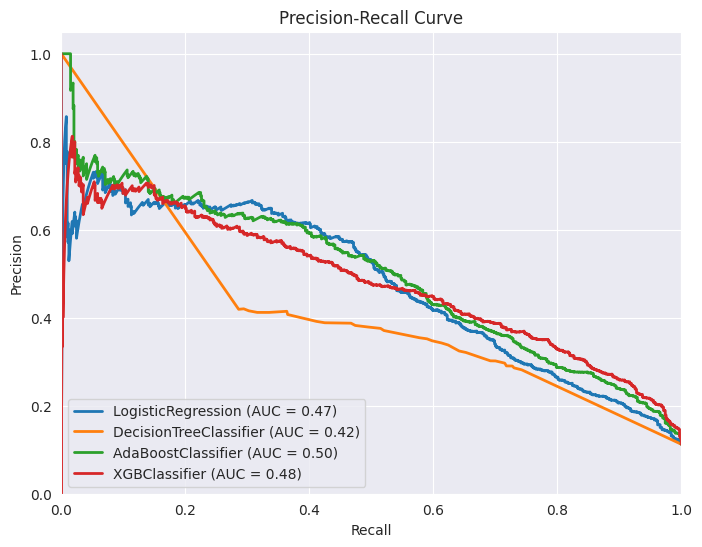

In [130]:
plt.figure(figsize=(8, 6))

for model in [best_logreg, best_tree, best_ada, best_xgb]:
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'{type(model).__name__} (AUC = {pr_auc:.2f})')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Show the plot
plt.show()

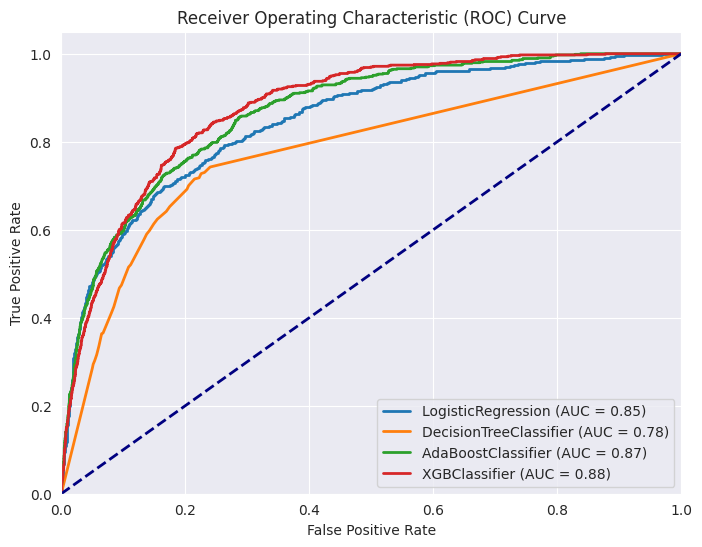

In [131]:
plt.figure(figsize=(8, 6))

for model in [best_logreg, best_tree, best_ada, best_xgb]:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

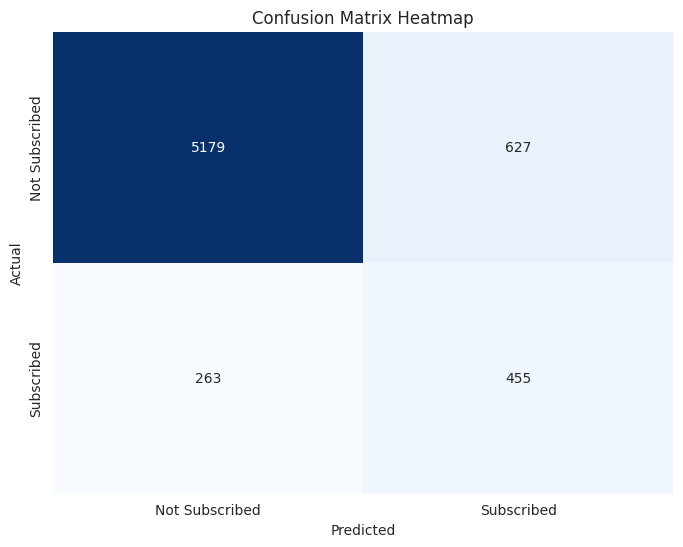

In [132]:
cm = confusion_matrix(y_validation, best_xgb.predict(X_validation))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Subscribed', 'Subscribed'],
            yticklabels=['Not Subscribed', 'Subscribed'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

### **Evaluation Best Model**

In [134]:
best_model = XGBClassifier(random_state=42, **xgb_search.best_params_)
best_model.fit(X_train_sm, y_train_sm)

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluasi performa model dengan test set
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8768074713049372

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5790
           1       0.42      0.63      0.51       734

    accuracy                           0.86      6524
   macro avg       0.69      0.76      0.71      6524
weighted avg       0.89      0.86      0.87      6524



In [147]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

total_predicted_positives = tp + fp
total_actual_positives = tp + fn
total_population = tp + fn + tn + fp

conversion_rate_without_model = total_actual_positives / total_population
conversion_rate_with_model = tp / total_predicted_positives

print(cm, '\n')
print(f'Conversion Rate (without model): {conversion_rate_without_model:.2%}')
print(f'Conversion Rate (with model): {conversion_rate_with_model:.2%}')

[[5157  633]
 [ 269  465]] 

Conversion Rate (without model): 11.25%
Conversion Rate (with model): 42.35%


## **Business Recommendation**

Based on the observations from the time deposit campaign data, here are some business recommendations:
- Focus marketing efforts on customers aged 30-40 years, as they constitute the majority of campaign participants. Additionally, consider targeting younger (students) and older (retirees) age groups, as they show higher subscription rates to term deposits.
- Focus on interactions lasting more than 5 minutes, as these have shown to significantly increase the likelihood of subscription. Allocate resources to enhance the quality and depth of these interactions to maximize impact.
- Recognize that higher education levels and single marital status correlate with higher subscription rates. Develop targeted marketing strategies that resonate with educated individuals and create specialized offerings for single customers.
- Aim for an optimal number of 2000 campaign activities per time period (month). Rather than increasing the frequency of campaigns, ensure each interaction is strategically planned and executed to maximize effectiveness.
- Implement retention strategies for customers who previously subscribed. Offer personalized incentives and loyalty programs to maintain engagement and foster long-term relationships.

By implementing these revised strategies, the campaign can optimize resources, enhance engagement with target segments, and improve overall subscription rates for term deposits effectively.